In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def load_data():
    """Charge les données avec dates"""
    df = pd.read_csv("../data/RAW_recipes.csv")
    
    # Convertir submitted en datetime
    df['date'] = pd.to_datetime(df['submitted'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    return df

In [3]:


def recipes_over_time(df):
    """Évolution du nombre de recettes"""
    
    print("\n" + "="*60)
    print("ÉVOLUTION TEMPORELLE")
    print("="*60)
    
    # Nombre de recettes par année
    recipes_per_year = df.groupby('year').size()
    
    print(f"\n Statistiques temporelles:")
    print(f"  Première recette: {df['date'].min()}")
    print(f"  Dernière recette: {df['date'].max()}")
    print(f"  Période couverte: {df['year'].max() - df['year'].min() + 1} ans")
    
    print(f"\n Années les plus productives:")
    top_years = recipes_per_year.nlargest(5)
    for year, count in top_years.items():
        print(f"  {year}: {count:,} recettes")
    
    # Visualisation
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Par année
    axes[0].plot(recipes_per_year.index, recipes_per_year.values, 
                 marker='o', linewidth=2, markersize=5)
    axes[0].fill_between(recipes_per_year.index, recipes_per_year.values, alpha=0.3)
    axes[0].set_xlabel('Année', fontsize=12)
    axes[0].set_ylabel('Nombre de recettes', fontsize=12)
    axes[0].set_title('Nombre de recettes publiées par année', 
                      fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Par mois (toutes années confondues)
    recipes_per_month = df.groupby('month').size()
    month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
                   'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
    
    axes[1].bar(recipes_per_month.index, recipes_per_month.values, 
                color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Mois', fontsize=12)
    axes[1].set_ylabel('Nombre de recettes', fontsize=12)
    axes[1].set_title('Distribution mensuelle des publications (toutes années)', 
                      fontsize=14, fontweight='bold')
    axes[1].set_xticks(range(1, 13))
    axes[1].set_xticklabels(month_names)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
   
    plt.show()

 Chargement des données...
 231,637 recettes chargées


ÉVOLUTION TEMPORELLE

 Statistiques temporelles:
  Première recette: 1999-08-06 00:00:00
  Dernière recette: 2018-12-04 00:00:00
  Période couverte: 20 ans

 Années les plus productives:
  2007: 34,299 recettes
  2008: 30,745 recettes
  2006: 27,260 recettes
  2005: 23,865 recettes
  2009: 22,547 recettes


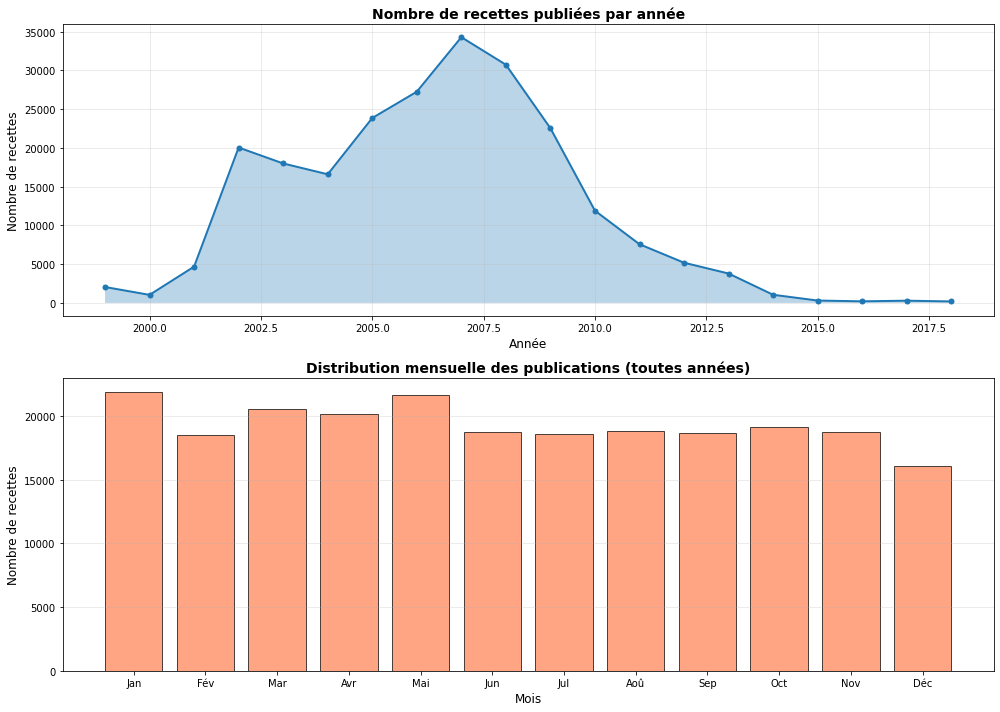

In [4]:


def main():
    """Fonction principale"""
    
    print(" Chargement des données...")
    df = load_data()
    print(f" {len(df):,} recettes chargées\n")
    
    recipes_over_time(df)
    
    

if __name__ == "__main__":
    main()